In [1]:
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape

Using TensorFlow backend.


(60000, 28, 28)

In [2]:
import numpy as np
unique,count = np.unique(y_train,return_counts=True)
print(unique)
print(count)

[0 1 2 3 4 5 6 7 8 9]
[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [3]:
print('Train Labels and counts:')
print(dict(zip(unique,count)))

Train Labels and counts:
{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [4]:
unique,count = np.unique(y_test,return_counts=True)
print(unique)
print(count)
print('Test Labels and counts:')
print(dict(zip(unique,count)))

[0 1 2 3 4 5 6 7 8 9]
[ 980 1135 1032 1010  982  892  958 1028  974 1009]
Test Labels and counts:
{0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [5]:
indexes = np.random.randint(0,X_train.shape[0],size=25)
indexes

array([35077,  2539, 40970, 32803, 56497, 35270, 51091, 21274, 43557,
       32564, 47587, 35494, 32550, 15819, 38326,  3140, 22243,  1144,
       41368, 54710, 46322, 33044, 50169,  6997, 57962])

In [6]:
images = X_train[indexes]
labels = y_train[indexes]
images.shape

(25, 28, 28)

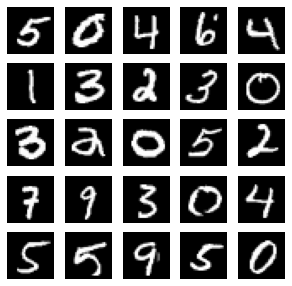

In [7]:
#Ploting the Images of 25 items.
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')


In [8]:
num_labels = len(np.unique(y_train))
num_labels

10

In [9]:
# One hot encoding
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
input_size = X_train.shape[1]*X_train.shape[2]
input_size

784

In [12]:
X_train = np.reshape(X_train,[X_train.shape[0],input_size])
 

In [13]:
X_train.shape

(60000, 784)

In [14]:
X_test = np.reshape(X_test,[X_test.shape[0],input_size])
X_test.shape

(10000, 784)

In [15]:
X_test = X_test.astype('float32')/255
X_train = X_train.astype('float32')/255

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
batch_size =128
num_percepton =256
dropout_rate = 0.45

model = Sequential()
model.add(Dense(num_percepton,input_dim = input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

model.add(Dense(num_percepton))
model.add(Activation('relu'))
model.add(Dropout(dropout_rate))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

#to display model summary
model.summary()

AttributeError: module 'tensorflow.python.framework.ops' has no attribute '_TensorLike'

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,batch_size=batch_size)

In [ ]:
loss,score = model.evaluate(X_test,y_test,batch_size=batch_size)
print('Loss : ',loss)
print('Accuracy Score : ',score)